In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
content_df= pd.read_csv(r'C:\Users\Admin\Downloads\Content.csv', index_col=0)
reaction_df = pd.read_csv(r'C:\Users\Admin\Downloads\Reactions1.csv', index_col=0)
reactiontypes_df = pd.read_csv(r'C:\Users\Admin\Downloads\ReactionTypes1.csv', index_col=0)

#content_df = pd.read_csv("Content.csv")
#content_df 



In [4]:
#We inspect a few rows here and do the aforementioned rename
content_df.rename(columns={'Type': 'Type of Content'}, inplace=True)

content_df[['Content ID', 'Type of Content', 'Category']].head()

,Content ID,Type of Content,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [5]:
#We inspect a few rows here and do the aforementioned rename
reaction_df.rename(columns={'Type': 'Type of Reaction'}, inplace=True)

reaction_df[['Content ID', 'User ID', 'Type of Reaction']].head()

,Content ID,User ID,Type of Reaction
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust


In [6]:
#We inspect a few rows here and do the aforementioned rename
reactiontypes_df.rename(columns={'Type': 'Type of Reaction'}, inplace=True)

reactiontypes_df[['Type of Reaction', 'Sentiment', 'Score']].head()

,Type of Reaction,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [8]:


content_df = content_df[['Content ID', 'Type of Content', 'Category']]

content_df.head()

,Content ID,Type of Content,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [9]:
print('Before duplicates are dropped, we have this many rows: ', content_df.shape[0])

Before duplicates are dropped, we have this many rows:  1000


In [11]:
content_df.drop_duplicates(inplace=True)
content_df.reset_index(drop=True, inplace=True)

print('After duplicates are dropped, we have this many rows: ', content_df.shape[0])

After duplicates are dropped, we have this many rows:  1000


In [12]:
content_df['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [13]:
def category_fixer(row) :
    if '\'' in row or '\"' in row:
        row = row[1:-1].lower()
        return row
    else :
        row = row.lower()
        return row
    
content_df['Category'] = content_df['Category'].map(lambda row: category_fixer(row))
content_df['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [14]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Content ID       1000 non-null   object
 1   Type of Content  1000 non-null   object
 2   Category         1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [15]:
reaction_df = reaction_df[['Content ID', 'User ID', 'Type of Reaction']]

reaction_df.head()

,Content ID,User ID,Type of Reaction
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust


In [16]:
print('Before duplicates are dropped, we have this many rows: ', reaction_df.shape[0])

Before duplicates are dropped, we have this many rows:  25553


In [19]:
reaction_df.drop_duplicates(inplace=True)
reaction_df.reset_index(drop=True, inplace=True)
print('After duplicates are dropped, we have this many rows: ',reaction_df.shape[0])


After duplicates are dropped, we have this many rows:  25407


In [20]:
reaction_df['Type of Reaction'].unique()

array([nan, 'disgust', 'dislike', 'scared', 'interested', 'peeking',
       'cherish', 'hate', 'love', 'indifferent', 'super love',
       'intrigued', 'worried', 'like', 'heart', 'want', 'adore'],
      dtype=object)

In [21]:
reaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25407 entries, 0 to 25406
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Content ID        25407 non-null  object
 1   User ID           22501 non-null  object
 2   Type of Reaction  24427 non-null  object
dtypes: object(3)
memory usage: 595.6+ KB


In [22]:
print('Before nulls are dropped, we have this many rows: ', reaction_df.shape[0])

reaction_df.dropna(inplace=True)
reaction_df.reset_index(drop=True, inplace=True)

print('After nulls are dropped, we have this many rows: ', reaction_df.shape[0])

Before nulls are dropped, we have this many rows:  25407
After nulls are dropped, we have this many rows:  22501


In [23]:
# double check
reaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22501 entries, 0 to 22500
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Content ID        22501 non-null  object
 1   User ID           22501 non-null  object
 2   Type of Reaction  22501 non-null  object
dtypes: object(3)
memory usage: 527.5+ KB


In [24]:
reactiontypes_df = reactiontypes_df[['Type of Reaction', 'Sentiment', 'Score']]

reactiontypes_df.head()

,Type of Reaction,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [25]:
print('Before duplicates are dropped, we have this many rows: ', reactiontypes_df.shape[0])

reactiontypes_df.drop_duplicates(inplace=True)
reactiontypes_df.reset_index(drop=True, inplace=True)

print('After duplicates are dropped, we have this many rows: ', reactiontypes_df.shape[0])

Before duplicates are dropped, we have this many rows:  16
After duplicates are dropped, we have this many rows:  16


In [26]:
reactiontypes_df['Type of Reaction'].unique()

array(['heart', 'want', 'disgust', 'hate', 'interested', 'indifferent',
       'love', 'super love', 'cherish', 'adore', 'like', 'dislike',
       'intrigued', 'peeking', 'scared', 'worried'], dtype=object)

In [ ]:
#no nan or duplicate


In [27]:
reactiontypes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Type of Reaction  16 non-null     object
 1   Sentiment         16 non-null     object
 2   Score             16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


In [ ]:
#Now we have no nulls here and the duplicates have been dealt with, however sometimes this isn't entirely enough 
#to assume that the data is clean and ready to go. Specifically, when it comes to numerical columns, such as score, 
#you sometimes might have numbers (that aren't nulls), but still aren't correct. For example, we shouldn't have 
#negative values or values over 100 in the score column.

#First, let's investigate the various value ranges within the score column.

In [28]:
scores = reactiontypes_df['Score'].unique()
scores.sort()
print(scores)

[ 0  5 10 12 15 20 30 35 45 50 60 65 70 72 75]


In [ ]:
#Fortunately, we have no out of range values in the column, so there's no need to tweak any of the existing values.

#Now that our data is prepared, we must now create our final dataset.

#The dataframes will generally be joined in the following ways:

#Content will be joined to the Reaction dataframe by Content ID. ReactionTypes will then be joined by Type of Reaction.

In [29]:
final_df = pd.merge(reaction_df, reactiontypes_df, on='Type of Reaction', how='inner')
final_df = pd.merge(final_df, content_df, on='Content ID', how='inner')
final_df

,Content ID,User ID,Type of Reaction,Sentiment,Score,Type of Content,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,negative,0,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,negative,0,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,13c06e7e-833d-47eb-a790-5e09ccfd8d2c,disgust,negative,0,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,negative,10,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,69532ce2-1ffe-4187-8042-0230d115b24e,dislike,negative,10,photo,studying
...,...,...,...,...,...,...,...
22496,5656bfe4-bcc1-4426-94b6-1f9dfe9a0db4,7d8c8c77-77a8-4743-b35f-349c0ac07866,intrigued,positive,45,video,travel
22497,e6ee2244-9382-49a9-8cbf-fa54aaaa2392,87026ce7-fd0b-4b57-9126-d4bae2c1ee0e,intrigued,positive,45,audio,travel
22498,a55b215b-06c5-4ef3-ac14-7e1569c3ad2e,bcdf88dc-2a52-4716-bc24-a1b46040c8ce,intrigued,positive,45,GIF,education
22499,a55b215b-06c5-4ef3-ac14-7e1569c3ad2e,0c5b0547-820a-4beb-832e-3162f74ccfa7,adore,positive,72,GIF,education


In [41]:
#into csv file
final_df.to_csv(r'C:\Users\Admin\Downloads\Content.csv', index=0)
  
    


In [ ]:
#Visualizations
#Now that our data is prepared, it's time to answer the original question (and possibly a few more if they come up). 
#As we ask them, we can begin generating our visualizations along the way.

#First, let us bring up the data for the top 5 categories according to popularity.

In [42]:
category_scores = pd.DataFrame(final_df.groupby('Category')['Score'].sum()).sort_values(by=['Score'], ascending=False)
category_scores

,Score
Category,
animals,68463
science,65325
healthy eating,63138
technology,62918
food,61413
culture,60663
travel,59318
cooking,59154
soccer,53079


In [ ]:
#As we can see, the top 5 categories in order are animals, science, technology, travel, and healthy eating. 
#The bottom 5 are dogs, studying, tennis, veganism, and public speaking.

#Now we can prepare the visualizations. The simplest way of comparing multiple categories against each other on the same 
#axis is by using a bar chart.

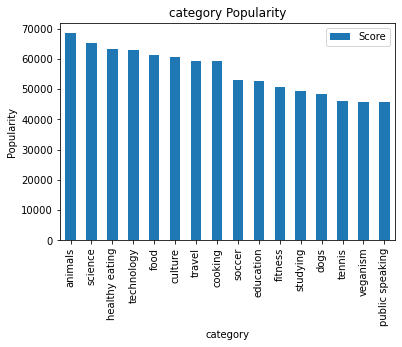

In [45]:
category_scores.plot(kind='bar')
plt.title('category Popularity')
plt.ylabel('Popularity')
plt.label('category')

plt.show()

In [ ]:
#How about we dig a bit deeper into the data? Sometimes, topics that are very popular can sometimes be controversial.
#Now we'll check for the total sentiment per category.

In [53]:
categories =pd.DataFrame(final_df.groupby('Category')['Sentiment'].value_counts()).rename(columns={'Sentiment': 'Sentiment Total'}).reset_index().sort_values(['Sentiment', 'Sentiment Total'], ascending=False)
categories

,Category,Sentiment,Sentiment Total
0,animals,positive,960
27,science,positive,932
21,healthy eating,positive,896
36,technology,positive,894
18,food,positive,869
6,culture,positive,855
3,cooking,positive,851
42,travel,positive,841
12,education,positive,750
30,soccer,positive,750


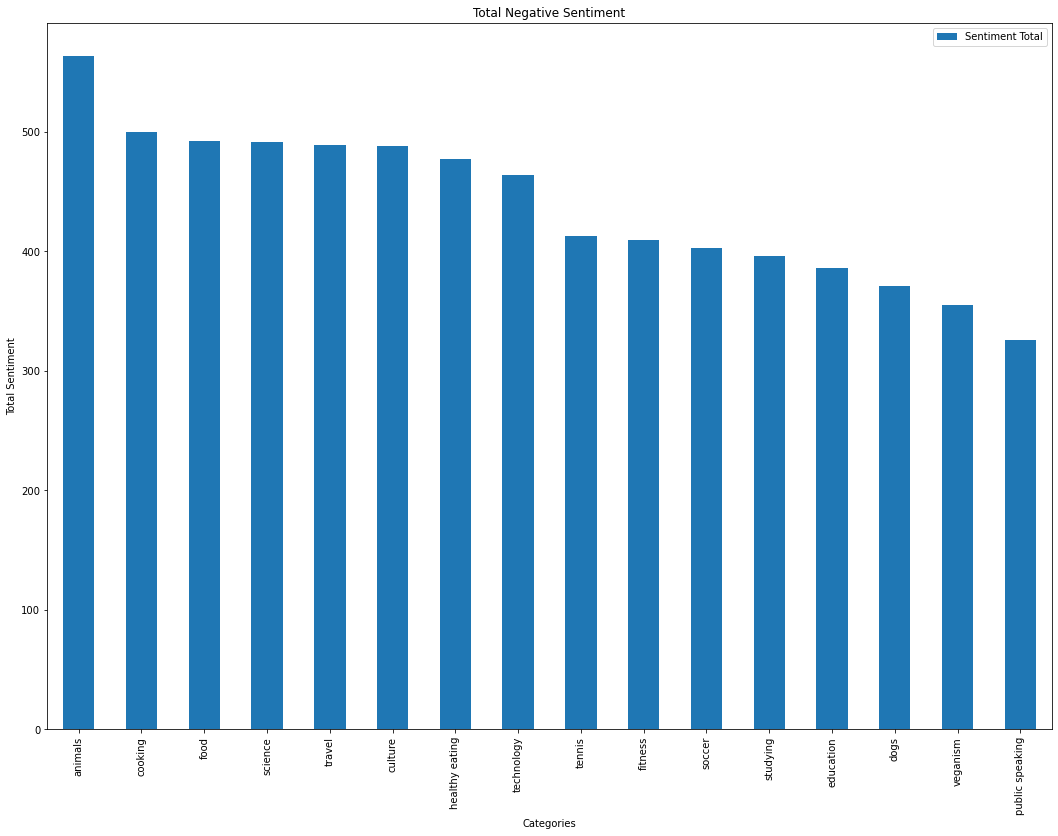

In [48]:
negative_sentiment_scores = categories[categories['Sentiment'] == 'negative']
negative_sentiment_scores[['Category', 'Sentiment Total']].set_index('Category').plot(kind='bar', figsize=(18, 13))

plt.title('Total Negative Sentiment')
plt.xlabel('Categories')
plt.ylabel('Total Sentiment')

plt.show()

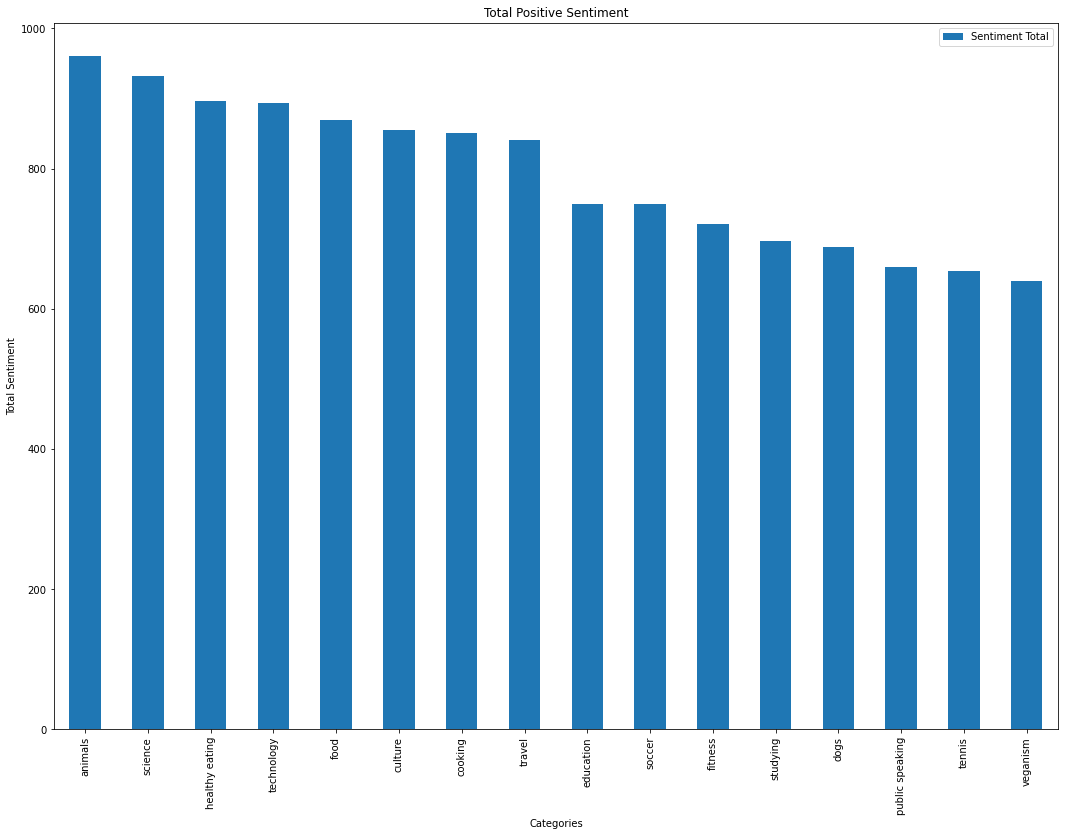

In [49]:
positive_sentiment_scores = categories[categories['Sentiment'] == 'positive']
positive_sentiment_scores[['Category', 'Sentiment Total']].set_index('Category').plot(kind='bar', figsize=(18, 13))

plt.title('Total Positive Sentiment')
plt.xlabel('Categories')
plt.ylabel('Total Sentiment')

plt.show()

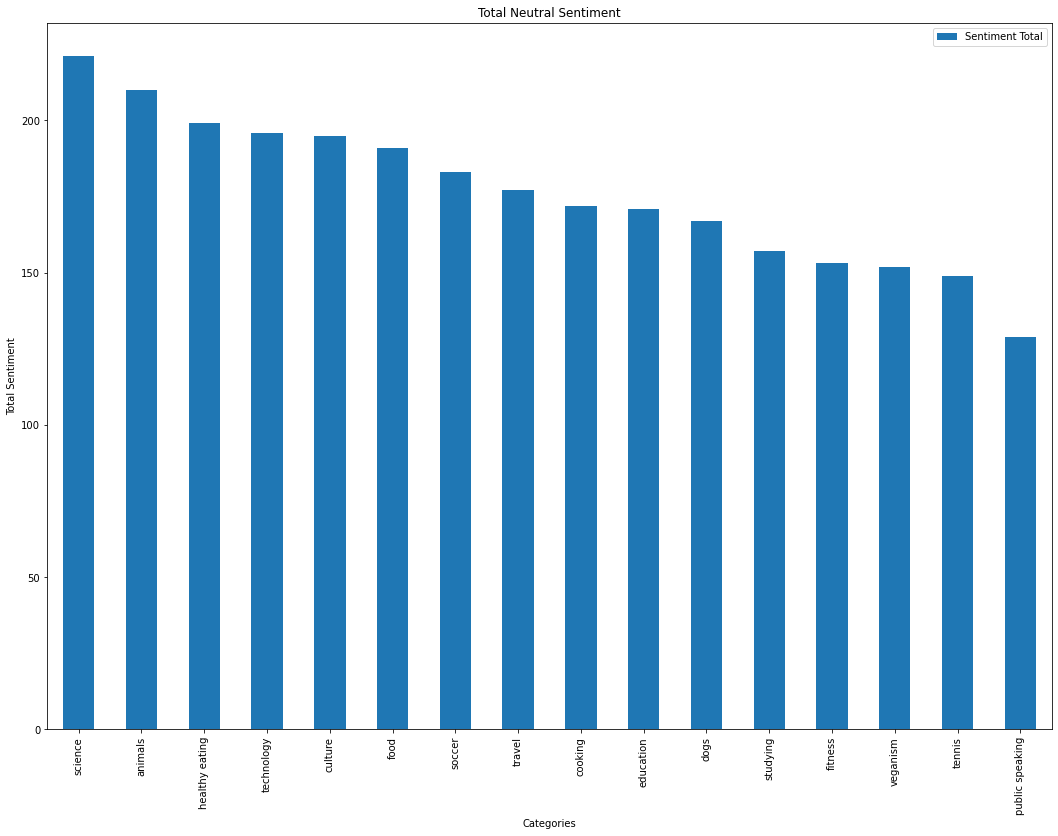

In [50]:
neutral_sentiment_scores = categories[categories['Sentiment'] == 'neutral']
neutral_sentiment_scores[['Category', 'Sentiment Total']].set_index('Category').plot(kind='bar', figsize=(18, 13))

plt.title('Total Neutral Sentiment')
plt.xlabel('Categories')
plt.ylabel('Total Sentiment')

plt.show()

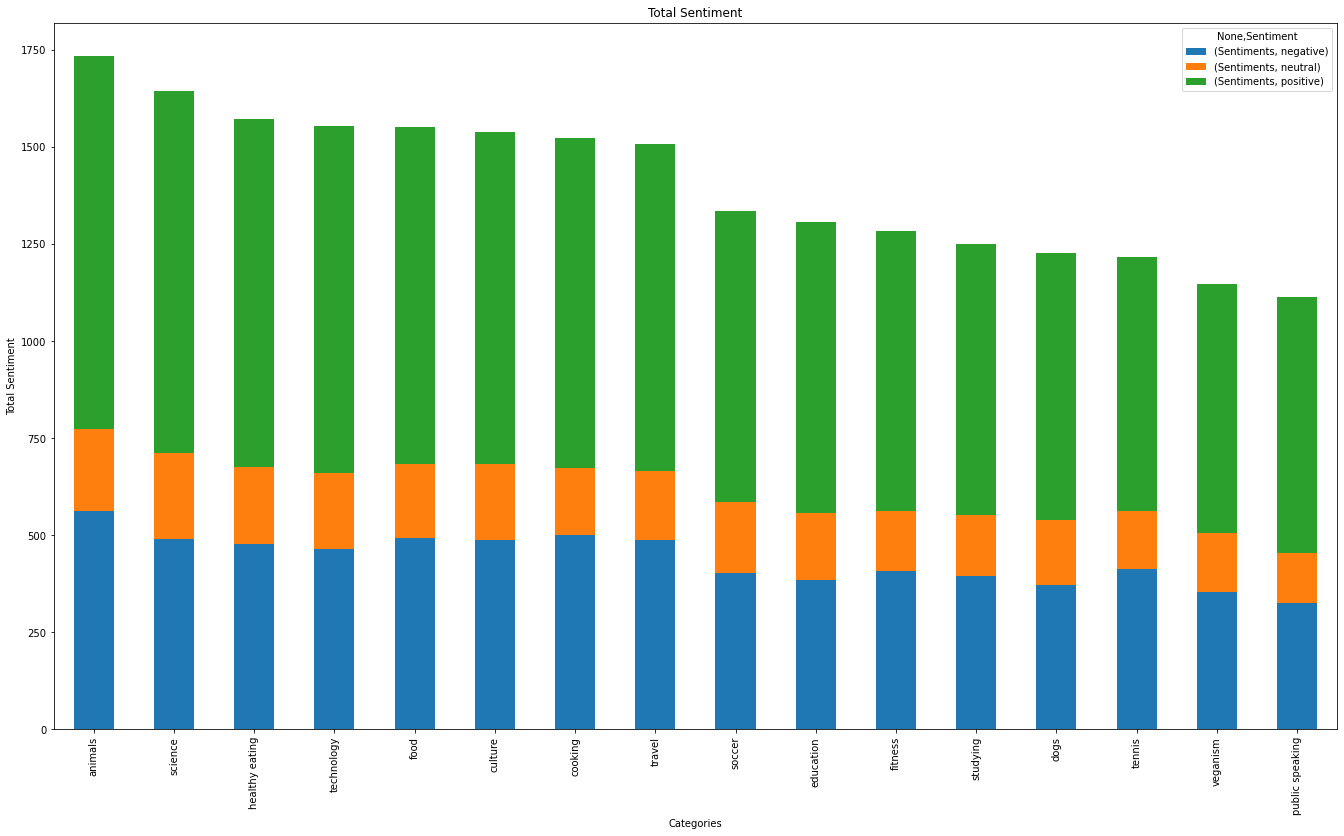

In [51]:
total_sentiment = pd.DataFrame(final_df.groupby('Category')['Sentiment'].value_counts()).rename(columns={'Sentiment': 'Sentiments'})

temp = total_sentiment.unstack()
temp['Total'] = temp.sum(axis=1)
temp.sort_values(by='Total', ascending=False, inplace=True)
temp.drop('Total', axis=1, inplace=True)

temp.plot(kind='bar', stacked=True, figsize=(23,13))

plt.title('Total Sentiment')
plt.xlabel('Categories')
plt.ylabel('Total Sentiment')

plt.show()